In [1]:
#Question: Are certain NFL franchises profitable to bet the over/under on for the last 10 years? 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
scores = pd.read_csv("spreadspoke_scores.csv")
teams = pd.read_csv("nfl_teams.csv")

In [4]:
scores.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,9/2/1966,1966,1,False,Miami Dolphins,14,23,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71.0,NaN
1,9/3/1966,1966,1,False,Houston Oilers,45,7,Denver Broncos,NaN,NaN,NaN,Rice Stadium,False,81.0,7.0,70.0,NaN
2,9/4/1966,1966,1,False,San Diego Chargers,27,7,Buffalo Bills,NaN,NaN,NaN,Balboa Stadium,False,70.0,7.0,82.0,NaN
3,9/9/1966,1966,2,False,Miami Dolphins,14,19,New York Jets,NaN,NaN,NaN,Orange Bowl,False,82.0,11.0,78.0,NaN
4,9/10/1966,1966,1,False,Green Bay Packers,24,3,Baltimore Colts,NaN,NaN,NaN,Lambeau Field,False,64.0,8.0,62.0,NaN


In [5]:
#Regular Season Scores since 2015
scores = scores[scores['schedule_season']>=2015]
scores = scores[scores['schedule_playoff']==False]

In [6]:
scores = scores.drop(columns=["schedule_week", "schedule_date", "schedule_season", "schedule_playoff", "stadium", "stadium_neutral", "weather_temperature", "weather_wind_mph", "weather_humidity", "weather_detail"])
scores.head()

,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line
11343,New England Patriots,28,21,Pittsburgh Steelers,NE,-7.0,51
11344,Arizona Cardinals,31,19,New Orleans Saints,ARI,-2.5,48.5
11345,Buffalo Bills,27,14,Indianapolis Colts,IND,-1.0,44.5
11346,Chicago Bears,23,31,Green Bay Packers,GB,-6.5,48.5
11347,Dallas Cowboys,27,26,New York Giants,DAL,-7.0,52.5


In [7]:
teams.head()

,team_name,team_name_short,team_id,team_id_pfr,team_conference,team_division,team_conference_pre2002,team_division_pre2002
0,Arizona Cardinals,Cardinals,ARI,CRD,NFC,NFC West,NFC,NFC West
1,Atlanta Falcons,Falcons,ATL,ATL,NFC,NFC South,NFC,NFC West
2,Baltimore Colts,Colts,IND,CLT,AFC,NaN,AFC,AFC East
3,Baltimore Ravens,Ravens,BAL,RAV,AFC,AFC North,AFC,AFC Central
4,Boston Patriots,Patriots,NE,NWE,AFC,NaN,AFC,NaN


In [8]:
teams = teams.drop(columns=['team_name_short', 'team_id_pfr', 'team_conference', "team_division", "team_conference_pre2002", "team_division_pre2002"])


In [9]:
id_dict = dict(zip(teams.team_id, teams.team_name))
id_dict

{'ARI': 'St. Louis Cardinals',
 'ATL': 'Atlanta Falcons',
 'IND': 'Indianapolis Colts',
 'BAL': 'Baltimore Ravens',
 'NE': 'New England Patriots',
 'BUF': 'Buffalo Bills',
 'CAR': 'Carolina Panthers',
 'CHI': 'Chicago Bears',
 'CIN': 'Cincinnati Bengals',
 'CLE': 'Cleveland Browns',
 'DAL': 'Dallas Cowboys',
 'DEN': 'Denver Broncos',
 'DET': 'Detroit Lions',
 'GB': 'Green Bay Packers',
 'TEN': 'Tennessee Titans',
 'HOU': 'Houston Texans',
 'JAX': 'Jacksonville Jaguars',
 'KC': 'Kansas City Chiefs',
 'LVR': 'Oakland Raiders',
 'LAC': 'San Diego Chargers',
 'LAR': 'St. Louis Rams',
 'MIA': 'Miami Dolphins',
 'MIN': 'Minnesota Vikings',
 'NO': 'New Orleans Saints',
 'NYG': 'New York Giants',
 'NYJ': 'New York Jets',
 'PHI': 'Philadelphia Eagles',
 'PIT': 'Pittsburgh Steelers',
 'SF': 'San Francisco 49ers',
 'SEA': 'Seattle Seahawks',
 'TB': 'Tampa Bay Buccaneers',
 'WAS': 'Washington Redskins'}

In [10]:
scores["over_under_line"] = scores["over_under_line"].astype("float")
scores.dtypes

team_home            object
score_home            int64
score_away            int64
team_away            object
team_favorite_id     object
spread_favorite     float64
over_under_line     float64
dtype: object

In [11]:
scores["total_points"] = scores["score_home"] + scores["score_away"]
cond = [scores["total_points"]>scores["over_under_line"], scores["total_points"]==scores["over_under_line"], scores["total_points"]<scores["over_under_line"]]
values = ["over", "push", "under"]
scores["o_u"] = np.select(cond, values)

In [12]:
scores.head()

,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,total_points,o_u
11343,New England Patriots,28,21,Pittsburgh Steelers,NE,-7.0,51.0,49,under
11344,Arizona Cardinals,31,19,New Orleans Saints,ARI,-2.5,48.5,50,over
11345,Buffalo Bills,27,14,Indianapolis Colts,IND,-1.0,44.5,41,under
11346,Chicago Bears,23,31,Green Bay Packers,GB,-6.5,48.5,54,over
11347,Dallas Cowboys,27,26,New York Giants,DAL,-7.0,52.5,53,over


In [13]:
scores["team_favorite_id"] = scores["team_favorite_id"].map({'ARI': 'Arizona Cardinals',
 'ATL': 'Atlanta Falcons',
 'IND': 'Indianapolis Colts',
 'BAL': 'Baltimore Ravens',
 'NE': 'New England Patriots',
 'BUF': 'Buffalo Bills',
 'CAR': 'Carolina Panthers',
 'CHI': 'Chicago Bears',
 'CIN': 'Cincinnati Bengals',
 'CLE': 'Cleveland Browns',
 'DAL': 'Dallas Cowboys',
 'DEN': 'Denver Broncos',
 'DET': 'Detroit Lions',
 'GB': 'Green Bay Packers',
 'TEN': 'Tennessee Titans',
 'HOU': 'Houston Texans',
 'JAX': 'Jacksonville Jaguars',
 'KC': 'Kansas City Chiefs',
 'LVR': 'Las Vegas Raiders',
 'LAC': 'Los Angeles Chargers',
 'LAR': 'Los Angeles Rams',
 'MIA': 'Miami Dolphins',
 'MIN': 'Minnesota Vikings',
 'NO': 'New Orleans Saints',
 'NYG': 'New York Giants',
 'NYJ': 'New York Jets',
 'PHI': 'Philadelphia Eagles',
 'PIT': 'Pittsburgh Steelers',
 'SF': 'San Francisco 49ers',
 'SEA': 'Seattle Seahawks',
 'TB': 'Tampa Bay Buccaneers',
 'WAS': 'Washington Commanders'})
scores.head()

,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,total_points,o_u
11343,New England Patriots,28,21,Pittsburgh Steelers,New England Patriots,-7.0,51.0,49,under
11344,Arizona Cardinals,31,19,New Orleans Saints,Arizona Cardinals,-2.5,48.5,50,over
11345,Buffalo Bills,27,14,Indianapolis Colts,Indianapolis Colts,-1.0,44.5,41,under
11346,Chicago Bears,23,31,Green Bay Packers,Green Bay Packers,-6.5,48.5,54,over
11347,Dallas Cowboys,27,26,New York Giants,Dallas Cowboys,-7.0,52.5,53,over


In [14]:
#Look at data for outdated cities and team names
scores["team_home"].unique()

array(['New England Patriots', 'Arizona Cardinals', 'Buffalo Bills',
       'Chicago Bears', 'Dallas Cowboys', 'Denver Broncos',
       'Houston Texans', 'Jacksonville Jaguars', 'New York Jets',
       'Oakland Raiders', 'San Diego Chargers', 'St. Louis Rams',
       'Tampa Bay Buccaneers', 'Washington Redskins', 'Atlanta Falcons',
       'San Francisco 49ers', 'Kansas City Chiefs', 'Carolina Panthers',
       'Cincinnati Bengals', 'Cleveland Browns', 'Green Bay Packers',
       'Minnesota Vikings', 'New Orleans Saints', 'New York Giants',
       'Philadelphia Eagles', 'Pittsburgh Steelers', 'Indianapolis Colts',
       'Baltimore Ravens', 'Detroit Lions', 'Miami Dolphins',
       'Seattle Seahawks', 'Tennessee Titans', 'Los Angeles Rams',
       'Los Angeles Chargers', 'Washington Football Team',
       'Las Vegas Raiders', 'Washington Commanders'], dtype=object)

In [15]:
#Account for Franchise Name Changes and Location Switches
change = {'Oakland Raiders': 'Las Vegas Raiders', 'San Diego Chargers': "Los Angeles Chargers", 'St. Louis Rams': "Los Angeles Rams",'Washington Redskins': "Washington Commanders", "Washington Football Team": "Washington Commanders"}
scores.replace(change,inplace=True)
scores["team_home"].unique()

array(['New England Patriots', 'Arizona Cardinals', 'Buffalo Bills',
       'Chicago Bears', 'Dallas Cowboys', 'Denver Broncos',
       'Houston Texans', 'Jacksonville Jaguars', 'New York Jets',
       'Las Vegas Raiders', 'Los Angeles Chargers', 'Los Angeles Rams',
       'Tampa Bay Buccaneers', 'Washington Commanders', 'Atlanta Falcons',
       'San Francisco 49ers', 'Kansas City Chiefs', 'Carolina Panthers',
       'Cincinnati Bengals', 'Cleveland Browns', 'Green Bay Packers',
       'Minnesota Vikings', 'New Orleans Saints', 'New York Giants',
       'Philadelphia Eagles', 'Pittsburgh Steelers', 'Indianapolis Colts',
       'Baltimore Ravens', 'Detroit Lions', 'Miami Dolphins',
       'Seattle Seahawks', 'Tennessee Titans'], dtype=object)

In [16]:
#Make one data set with over/under/push data.
homeou = scores[["team_home", "o_u"]]
awayou = scores[["team_away", "o_u"]]
homeou = homeou.rename(columns={'team_home': "team"})
awayou = awayou.rename(columns={'team_away': "team"})
oudata = pd.concat([homeou, awayou])

In [17]:
#find percent of games
ou_percent = oudata.groupby("team").value_counts() / oudata['team'].value_counts() * 100

In [18]:
ou_percent = ou_percent.unstack(level=1)

In [19]:
ou_percent = ou_percent.fillna(0)

In [20]:
#sort the under column and over column so chart shows profitable teams at the top. 
ou_under = ou_percent['under'].sort_values(ascending=True)
ou_over = ou_percent['over'].sort_values(ascending=True)

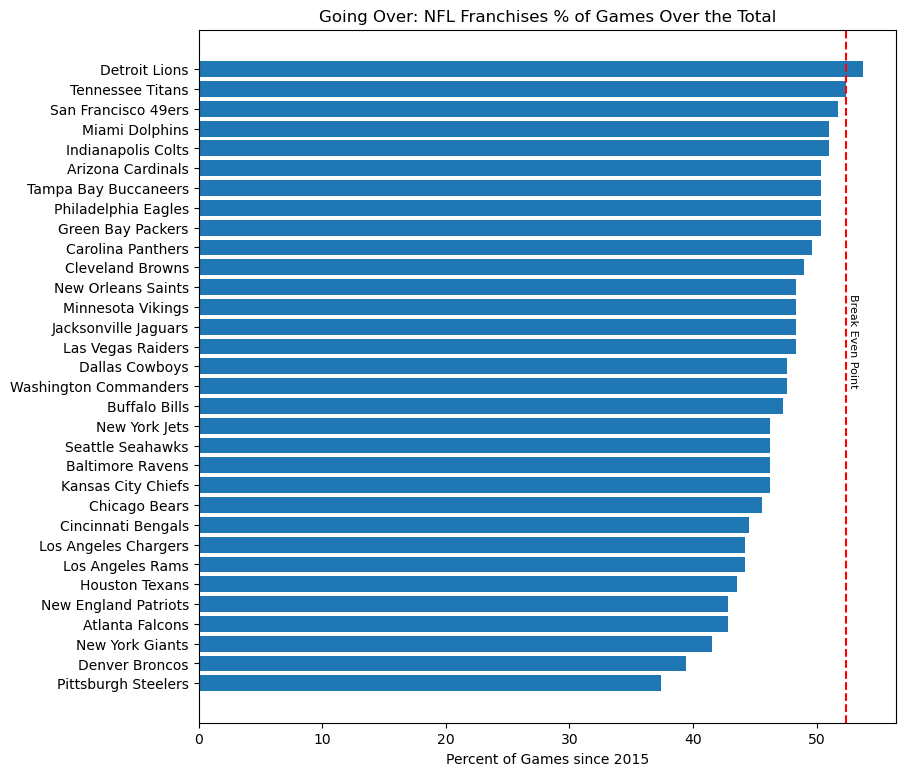

In [21]:
plt.figure(figsize=(9,9))
plt.barh(y=ou_over.index, width=ou_over)
plt.axvline(x=52.4, color='r', linestyle='--')
plt.text(52.5,15, "Break Even Point", size=8, rotation=270)
plt.xlabel("Percent of Games since 2015")
plt.title("Going Over: NFL Franchises % of Games Over the Total")
plt.show()

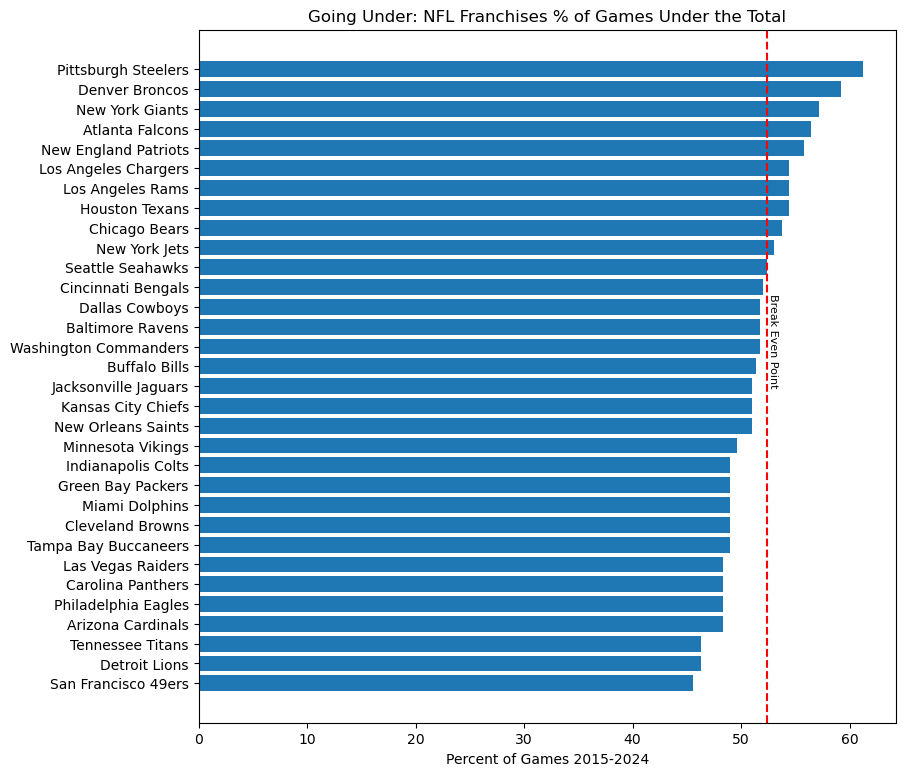

In [22]:
plt.figure(figsize=(9,9))
plt.barh(y=ou_under.index, width=ou_under)
plt.axvline(x=52.4, color='r', linestyle='--')
plt.text(52.5,15, "Break Even Point", size=8, rotation=270)
plt.xlabel("Percent of Games 2015-2024")
plt.title("Going Under: NFL Franchises % of Games Under the Total")
plt.show()